<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
import numpy as np

def sum_prod(X, V):
    result = np.zeros_like(X[0] @ V[0])
    
    for i in range(len(X)):
        result += X[i] @ V[i]
    
    return result

def test_sum_prod():
    
    # Тест 1: Одна матрица и один вектор
    X = [np.array([[1, 2], [3, 4]])]
    V = [np.array([[1], [2]])]
    result = sum_prod(X, V)
    expected = np.array([[5], [11]])
    if np.array_equal(result, expected):
        print("✅ Одна матрица и один вектор")
    else:
        print(f"❌ Одна матрица и один вектор: ожидалось {expected}, получено {result}")
    
    # Тест 2: Две матрицы и два вектора
    X = [
        np.array([[1, 0], [0, 1]]),
        np.array([[2, 0], [0, 2]])
    ]
    V = [
        np.array([[1], [2]]),
        np.array([[3], [4]])
    ]
    result = sum_prod(X, V)
    expected = np.array([[7], [10]])
    if np.array_equal(result, expected):
        print("✅ Две матрицы и два вектора")
    else:
        print(f"❌ Две матрицы и два вектора: ожидалось {expected}, получено {result}")
    
    # Тест 3: Три матрицы 3x3
    X = [
        np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
        np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]]),
        np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
    ]
    V = [
        np.array([[1], [0], [0]]),
        np.array([[0], [1], [0]]),
        np.array([[0], [0], [1]])
    ]
    result = sum_prod(X, V)
    expected = np.array([[1], [2], [1]])
    if np.array_equal(result, expected):
        print("✅ Три матрицы 3x3")
    else:
        print(f"❌ Три матрицы 3x3: ожидалось {expected}, получено {result}")
    
    # Тест 4: Нулевые матрицы
    X = [
        np.array([[0, 0], [0, 0]]),
        np.array([[0, 0], [0, 0]])
    ]
    V = [
        np.array([[1], [1]]),
        np.array([[2], [2]])
    ]
    result = sum_prod(X, V)
    expected = np.array([[0], [0]])
    if np.array_equal(result, expected):
        print("✅ Нулевые матрицы")
    else:
        print(f"❌ Нулевые матрицы: ожидалось {expected}, получено {result}")

test_sum_prod()

✅ Одна матрица и один вектор
✅ Две матрицы и два вектора
✅ Три матрицы 3x3
✅ Нулевые матрицы


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
import numpy as np

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    
    # Тест 1: Базовый случай с порогом по умолчанию
    M1 = np.array([[0.1, 0.6], [0.4, 0.9]])
    result1 = binarize(M1)
    expected1 = np.array([[0, 1], [0, 1]])
    if np.array_equal(result1, expected1):
        print("✅ Базовый случай с порогом 0.5")
    else:
        print(f"❌ Базовый случай: ожидалось {expected1}, получено {result1}")
    
    # Тест 2: Пользовательский порог
    M2 = np.array([[0.2, 0.7], [0.3, 0.8]])
    result2 = binarize(M2, threshold=0.6)
    expected2 = np.array([[0, 1], [0, 1]])
    if np.array_equal(result2, expected2):
        print("✅ Пользовательский порог 0.6")
    else:
        print(f"❌ Пользовательский порог: ожидалось {expected2}, получено {result2}")
    
    # Тест 3: Все значения выше порога
    M3 = np.array([[0.9, 0.8], [0.7, 0.6]])
    result3 = binarize(M3, threshold=0.5)
    expected3 = np.array([[1, 1], [1, 1]])
    if np.array_equal(result3, expected3):
        print("✅ Все значения выше порога")
    else:
        print(f"❌ Все значения выше порога: ожидалось {expected3}, получено {result3}")
    
    # Тест 4: Все значения ниже порога
    M4 = np.array([[0.1, 0.2], [0.3, 0.4]])
    result4 = binarize(M4, threshold=0.5)
    expected4 = np.array([[0, 0], [0, 0]])
    if np.array_equal(result4, expected4):
        print("✅ Все значения ниже порога")
    else:
        print(f"❌ Все значения ниже порога: ожидалось {expected4}, получено {result4}")
    
    # Тест 5: Граничные значения (равные порогу)
    M5 = np.array([[0.5, 0.5], [0.5, 0.5]])
    result5 = binarize(M5, threshold=0.5)
    expected5 = np.array([[0, 0], [0, 0]])  # > threshold, а не >=
    if np.array_equal(result5, expected5):
        print("✅ Граничные значения (строго больше)")
    else:
        print(f"❌ Граничные значения: ожидалось {expected5}, получено {result5}")
    
    # Тест 6: Отрицательные значения
    M6 = np.array([[-1.0, 0.0], [0.5, 1.0]])
    result6 = binarize(M6, threshold=0.0)
    expected6 = np.array([[0, 0], [1, 1]])
    if np.array_equal(result6, expected6):
        print("✅ Отрицательные значения")
    else:
        print(f"❌ Отрицательные значения: ожидалось {expected6}, получено {result6}")

test_binarize()


✅ Базовый случай с порогом 0.5
✅ Пользовательский порог 0.6
✅ Все значения выше порога
✅ Все значения ниже порога
✅ Граничные значения (строго больше)
✅ Отрицательные значения


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [9]:
import numpy as np

def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

def test_unique_functions():
    
    # Тест 1: Матрица с повторениями
    mat1 = np.array([[1, 2, 2],
                     [3, 3, 3],
                     [4, 5, 4]])
    
    rows1 = unique_rows(mat1)
    cols1 = unique_columns(mat1)
    
    expected_rows1 = [np.array([1, 2]), np.array([3]), np.array([4, 5])]
    expected_cols1 = [np.array([1, 3, 4]), np.array([2, 3, 5]), np.array([2, 3, 4])]
    
    rows_ok = all(np.array_equal(r, e) for r, e in zip(rows1, expected_rows1))
    cols_ok = all(np.array_equal(c, e) for c, e in zip(cols1, expected_cols1))
    
    if rows_ok and cols_ok:
        print("✅ Матрица с повторениями")
    else:
        print("❌ Матрица с повторениями")
    
    # Тест 2: Матрица без повторений
    mat2 = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])
    
    rows2 = unique_rows(mat2)
    cols2 = unique_columns(mat2)
    
    expected_rows2 = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
    expected_cols2 = [np.array([1, 4, 7]), np.array([2, 5, 8]), np.array([3, 6, 9])]
    
    rows_ok = all(np.array_equal(r, e) for r, e in zip(rows2, expected_rows2))
    cols_ok = all(np.array_equal(c, e) for c, e in zip(cols2, expected_cols2))
    
    if rows_ok and cols_ok:
        print("✅ Матрица без повторений")
    else:
        print("❌ Матрица без повторений")
    
    # Тест 3: Отрицательные числа
    mat3 = np.array([[-1, 0, -1],
                     [0, 1, 0]])
    
    rows3 = unique_rows(mat3)
    cols3 = unique_columns(mat3)
    
    expected_rows3 = [np.array([-1, 0]), np.array([0, 1])]
    expected_cols3 = [np.array([-1, 0]), np.array([0, 1]), np.array([-1, 0])]
    
    rows_ok = all(np.array_equal(r, e) for r, e in zip(rows3, expected_rows3))
    cols_ok = all(np.array_equal(c, e) for c, e in zip(cols3, expected_cols3))
    
    if rows_ok and cols_ok:
        print("✅ Отрицательные числа")
    else:
        print("❌ Отрицательные числа")

test_unique_functions()

✅ Матрица с повторениями
✅ Матрица без повторений
✅ Отрицательные числа


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Матожидание по строкам: [ 0.5015115   0.88511916 -0.55211224]
Дисперсия по строкам: [1.24599392 1.12021514 0.21855466]
Матожидание по столбцам: [ 0.31645217  0.89394702  0.21731101 -0.31501897]
Дисперсия по столбцам: [0.20090278 2.08025409 1.85069458 0.05512608]


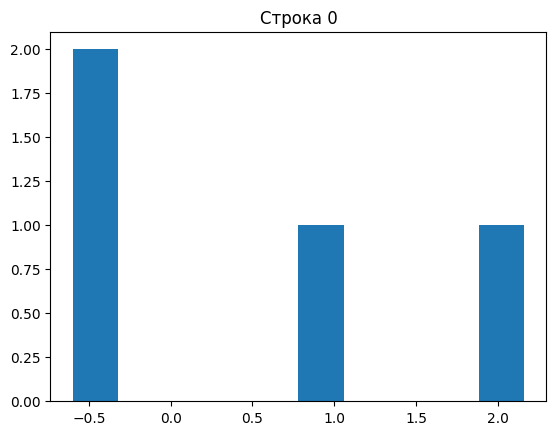

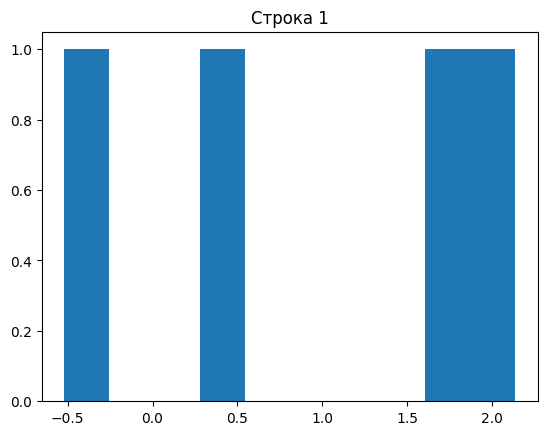

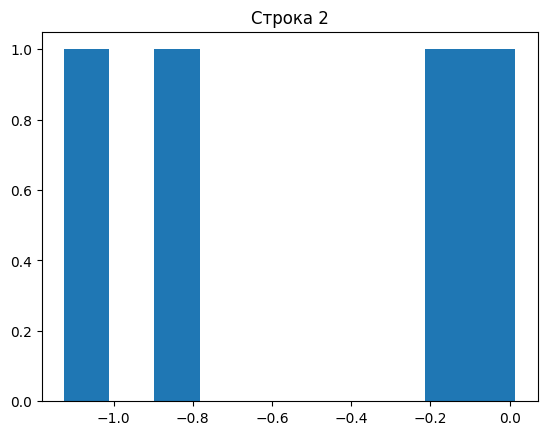

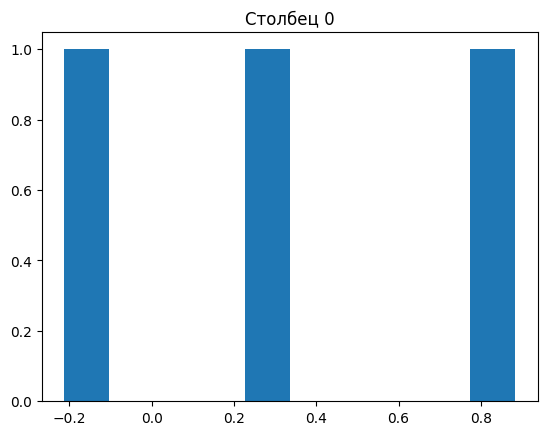

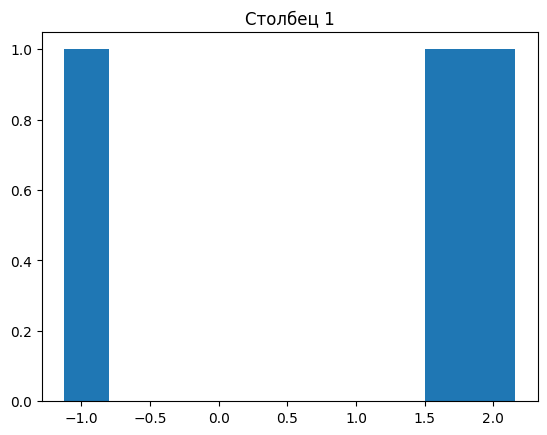

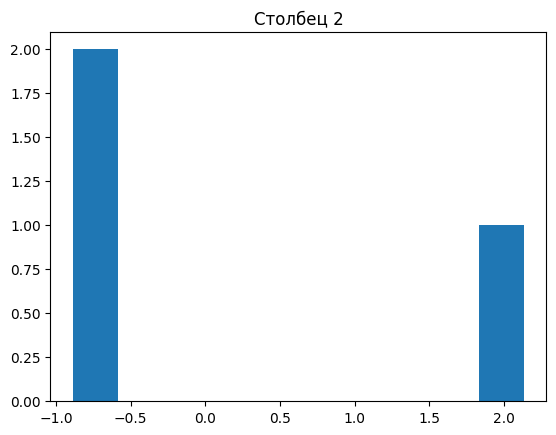

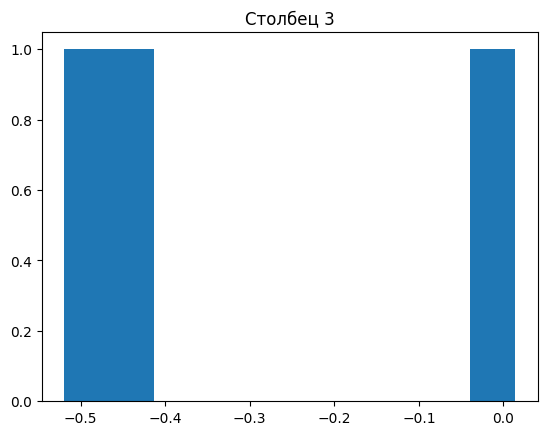

array([[ 0.88346566,  2.15878733, -0.59650641, -0.43970058],
       [ 0.27835517,  1.64735347,  2.13396068, -0.51919269],
       [-0.21246433, -1.12429974, -0.88552125,  0.01383636]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_matrix(m, n):
    matrix = np.random.normal(0, 1, (m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    print("Матожидание по строкам:", row_means)
    print("Дисперсия по строкам:", row_vars)
    print("Матожидание по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_vars)

    for i in range(m):
        plt.hist(matrix[i])
        plt.title(f'Строка {i}')
        plt.show()

    for j in range(n):
        plt.hist(matrix[:, j])
        plt.title(f'Столбец {j}')
        plt.show()
    
    return matrix

analyze_matrix(3, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [14]:
import numpy as np

def chessboard_matrix(m, n, a, b):
    matrix = np.zeros((m, n), dtype=type(a))
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix

def test_chessboard_matrix():
    
    # Тест 1: Матрица 2x2
    result1 = chessboard_matrix(2, 2, 0, 1)
    expected1 = np.array([[0, 1], [1, 0]])
    if np.array_equal(result1, expected1):
        print("✅ Матрица 2x2:")
        print(result1)
    else:
        print("❌ Матрица 2x2")
    
    # Тест 2: Матрица 3x3
    result2 = chessboard_matrix(3, 3, 'A', 'B')
    expected2 = np.array([['A', 'B', 'A'], ['B', 'A', 'B'], ['A', 'B', 'A']])
    if np.array_equal(result2, expected2):
        print("✅ Матрица 3x3 с символами:")
        print(result2)
    else:
        print("❌ Матрица 3x3 с символами")
    
    # Тест 3: Матрица 1x1
    result3 = chessboard_matrix(1, 1, 5, 10)
    expected3 = np.array([[5]])
    if np.array_equal(result3, expected3):
        print("✅ Матрица 1x1:")
        print(result3)
    else:
        print("❌ Матрица 1x1")
    
    # Тест 4: Матрица 2x4
    result4 = chessboard_matrix(2, 4, 1, -1)
    expected4 = np.array([[1, -1, 1, -1], [-1, 1, -1, 1]])
    if np.array_equal(result4, expected4):
        print("✅ Матрица 2x4:")
        print(result4)
    else:
        print("❌ Матрица 2x4")

test_chessboard_matrix()

✅ Матрица 2x2:
[[0 1]
 [1 0]]
✅ Матрица 3x3 с символами:
[['A' 'B' 'A']
 ['B' 'A' 'B']
 ['A' 'B' 'A']]
✅ Матрица 1x1:
[[5]]
✅ Матрица 2x4:
[[ 1 -1  1 -1]
 [-1  1 -1  1]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

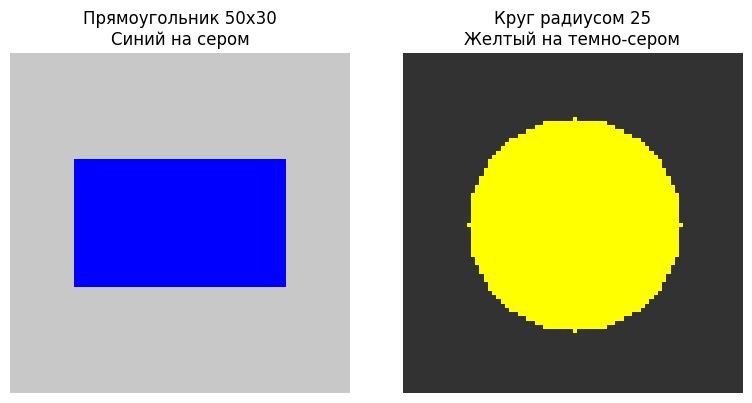

✅ Тест 1: Прямоугольник и круг


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    x_center, y_center = n // 2, m // 2
    x_start = max(0, x_center - a // 2)
    x_end = min(n, x_center + a // 2)
    y_start = max(0, y_center - b // 2)
    y_end = min(m, y_center + b // 2)
    
    image[y_start:y_end, x_start:x_end] = rectangle_color
    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:, :] = background_color
    
    x0, y0 = n // 2, m // 2
    y, x = np.ogrid[:m, :n]
    
    mask = ((x - x0) / a)**2 + ((y - y0) / b)**2 <= 1
    image[mask] = ellipse_color
    
    return image

def test_draw_functions():

    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    rect2 = draw_rectangle(50, 30, 80, 80, (0, 0, 255), (200, 200, 200))
    plt.imshow(rect2)
    plt.title('Прямоугольник 50x30\nСиний на сером')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    circle = draw_ellipse(25, 25, 80, 80, (255, 255, 0), (50, 50, 50))
    plt.imshow(circle)
    plt.title('Круг радиусом 25\nЖелтый на темно-сером')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Тест 1: Прямоугольник и круг")

test_draw_functions()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [19]:
import numpy as np

def analyze_time_series(series, p):
    mean = np.mean(series)
    variance = np.var(series)
    std = np.std(series)

    local_maxima = []
    local_minima = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(i)
        elif series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(i)

    moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')
    
    return {
        'mean': mean,
        'variance': variance,
        'std': std,
        'local_maxima': np.array(local_maxima),
        'local_minima': np.array(local_minima),
        'moving_average': moving_avg
    }

def test_analyze_time_series():
    
    # Тест 1: Простой ряд
    series1 = np.array([1, 3, 2, 4, 1, 5, 2])
    result1 = analyze_time_series(series1, 3)
    
    print("✅ Тест 1 - Простой ряд:")
    print(f"   Ряд: {series1}")
    print(f"   Матожидание: {result1['mean']:.2f}")
    print(f"   Дисперсия: {result1['variance']:.2f}")
    print(f"   СКО: {result1['std']:.2f}")
    print(f"   Локальные максимумы: индексы {result1['local_maxima']}")
    print(f"   Локальные минимумы: индексы {result1['local_minima']}")
    print(f"   Скользящее среднее (p=3): {result1['moving_average']}")
    
    # Тест 2: Ряд с повторяющимися значениями
    series2 = np.array([2, 1, 1, 3, 2, 2, 4, 3, 1])
    result2 = analyze_time_series(series2, 2)
    
    print("\n✅ Тест 2 - Ряд с повторениями:")
    print(f"   Ряд: {series2}")
    print(f"   Матожидание: {result2['mean']:.2f}")
    print(f"   Дисперсия: {result2['variance']:.2f}")
    print(f"   СКО: {result2['std']:.2f}")
    print(f"   Локальные максимумы: индексы {result2['local_maxima']}")
    print(f"   Локальные минимумы: индексы {result2['local_minima']}")
    print(f"   Скользящее среднее (p=2): {result2['moving_average']}")

test_analyze_time_series()

✅ Тест 1 - Простой ряд:
   Ряд: [1 3 2 4 1 5 2]
   Матожидание: 2.57
   Дисперсия: 1.96
   СКО: 1.40
   Локальные максимумы: индексы [1 3 5]
   Локальные минимумы: индексы [2 4]
   Скользящее среднее (p=3): [2.         3.         2.33333333 3.33333333 2.66666667]

✅ Тест 2 - Ряд с повторениями:
   Ряд: [2 1 1 3 2 2 4 3 1]
   Матожидание: 2.11
   Дисперсия: 0.99
   СКО: 0.99
   Локальные максимумы: индексы [3 6]
   Локальные минимумы: индексы []
   Скользящее среднее (p=2): [1.5 1.  2.  2.5 2.  3.  3.5 2. ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [22]:
import numpy as np

def one_hot_encoding(labels):
    labels = np.array(labels)
    n_classes = np.max(labels) + 1  
    n_samples = len(labels)

    one_hot = np.zeros((n_samples, n_classes))
    for i, label in enumerate(labels):
        one_hot[i, label] = 1
    
    return one_hot

def test_one_hot_encoding():
    
    # Тест 1: Пример из условия
    labels1 = [0, 2, 3, 0]
    result1 = one_hot_encoding(labels1)
    
    print("✅ Тест 1:")
    print(f"   Вход: {labels1}")
    print(f"   Результат:\n{result1}")
    
    # Тест 2: Последовательные метки
    labels2 = [0, 1, 2, 1, 0]
    result2 = one_hot_encoding(labels2)
    
    print("\n✅ Тест 2:")
    print(f"   Вход: {labels2}")
    print(f"   Результат:\n{result2}")

test_one_hot_encoding()

✅ Тест 1:
   Вход: [0, 2, 3, 0]
   Результат:
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]

✅ Тест 2:
   Вход: [0, 1, 2, 1, 0]
   Результат:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
